# Import Libraries

In [1]:
import tensorflow as tf
from keras.layers import Activation, Conv2D, Conv2DTranspose, Lambda, Input, Concatenate
from tensorflow.keras.metrics import R2Score
from tensorflow.keras.models import Model
from keras import initializers

from sklearn.preprocessing import MinMaxScaler
import numpy as np
from utils_experiments import *

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

2025-01-18 21:35:16.646087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-18 21:35:16.720738: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-18 21:35:16.741486: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-18 21:35:16.935520: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-18 21:35:19.512674: W tensorflow/compiler/tf2

In [2]:
def simplified_cnn(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    # Bloque 1
    x1 = tf.keras.layers.Conv2D(6, (5, 1), strides=1, padding='same', kernel_regularizer=tf.keras.regularizers.l1(0.01))(inputs)
    x1 = tf.keras.layers.LeakyReLU()(x1)
    x1 = tf.keras.layers.BatchNormalization()(x1)

    
    # Bloque 2
    x2 = tf.keras.layers.Conv2D(12, (5, 1), strides=1, padding='same', kernel_regularizer=tf.keras.regularizers.l1(0.01))(x1)
    x2 = tf.keras.layers.LeakyReLU()(x2)
    x2 = tf.keras.layers.BatchNormalization()(x2)
    
    # Output shape: (124, 1, 12)
    drop = tf.keras.layers.Dropout(0.5)(x2)  # 50% of neurons are randomly dropped during training
    
    flat_bottle_neck = tf.keras.layers.Flatten()(drop)
    dense_bottle_neck = tf.keras.layers.Dense(1032, activation='leaky_relu')(flat_bottle_neck)
    reshape_bottleneck = tf.keras.layers.Reshape((86, 1, 12))(dense_bottle_neck)
    
    # Bloque 3
    x3 = tf.keras.layers.Conv2D(24, (5, 1), strides=1, padding='same', kernel_regularizer=tf.keras.regularizers.l1(0.01))(reshape_bottleneck)
    x3 = tf.keras.layers.LeakyReLU()(x3)
    x3 = tf.keras.layers.BatchNormalization()(x3)

    
    # Bloque 4
    x4 = tf.keras.layers.Conv2D(30, (5, 1), strides=1, padding='same', kernel_regularizer=tf.keras.regularizers.l1(0.01))(x3)
    x4 = tf.keras.layers.LeakyReLU()(x4)
    x4 = tf.keras.layers.BatchNormalization()(x4)

    
    x4 = tf.keras.layers.Conv2D(1, (5, 1), strides=1, padding='same', kernel_regularizer=tf.keras.regularizers.l1(0.01))(x4)
    x4 = tf.keras.layers.LeakyReLU()(x4)
    outputs = tf.keras.layers.BatchNormalization()(x4)

    
    model = tf.keras.Model(inputs, outputs)
    return model

# Definir las dimensiones de entrada
input_shape = (86, 1, 1)
# Crear el modelo
model = simplified_cnn(input_shape)
print(model.summary())

I0000 00:00:1737254124.033664  257879 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1737254124.553796  257879 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1737254124.553866  257879 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1737254124.560547  257879 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1737254124.560644  257879 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 86, 1, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 86, 1, 6)       │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 86, 1, 6)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 86, 1, 6)       │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 86, 1, 12)      │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 86, 1, 12)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 86, 1, 12)      │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86, 1, 12)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1032)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1032)           │     1,066,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 86, 1, 12)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 86, 1, 24)      │         1,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 86, 1, 24)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 86, 1, 24)      │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 86, 1, 30)      │         3,630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 86, 1, 30)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 86, 1, 30)      │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 86, 1, 1)       │           151 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 86, 1, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 86, 1, 1)       │             4 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,072,001 (4.09 MB)

 Trainable params: 1,071,855 (4.09 MB)

 Non-trainable params: 146 (584.00 B)

None


In [3]:
model.load_weights('models/training_NFE.weights.h5')

In [4]:
depth_start = 4700
depth_end = 6420
depth_step = 20
depth_values = np.arange(depth_start, depth_end , depth_step)
num_ticks = 6  # Adjust the number of ticks as needed
depth_indices = np.linspace(0, len(depth_values) - 1, num_ticks, dtype=int)

# Exploration Block

In [5]:
Xtest = np.load('data/data_decatur/processed/seismic_exploration_block.npy').reshape(-1,86,1,1)
Ytest = np.load('data/data_decatur/processed/porosity_exploration_block.npy').reshape(-1,86,1,1)

Xtest = scale_to_range(Xtest)

Ypred = model.predict(Xtest)
Ypred = unscale_from_range(Ypred,Ytest.min(),Ytest.max())


I0000 00:00:1737254132.197548  257954 service.cc:146] XLA service 0x7fc480004160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737254132.198391  257954 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2025-01-18 21:35:32.258037: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-18 21:35:32.487302: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  54/1654 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step

I0000 00:00:1737254133.942629  257954 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1654/1654 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


In [6]:
Ytest = np.squeeze(Ytest)
Ypred = np.squeeze(Ypred)
Xtest = np.squeeze(Xtest)

In [7]:
Ytest = Ytest.reshape(143,370,86)
Ypred = Ypred.reshape(143,370,86)
Xtest = Xtest.reshape(143,370,86)

In [8]:
phi_difference_explo = Ytest - Ypred

# Plot

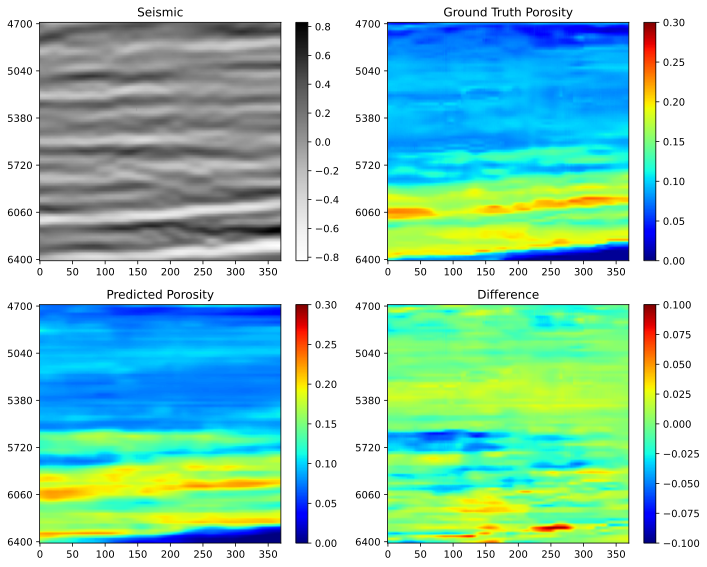

In [17]:
inline = 83
fig, ax = plt.subplots(2,2, figsize = (10, 8))

im1 = ax[0,0].imshow(Xtest[inline-40,:,:].T, cmap='Greys')
ax[0,0].set_title('Seismic')
ax[0,0].set_aspect('auto')
ax[0,0].set_yticks(depth_indices)
ax[0,0].set_yticklabels(depth_values[depth_indices])
fig.colorbar(im1, ax=ax[0,0], shrink=1)

im2 = ax[0,1].imshow(Ytest[inline-40,:,:].T, vmin=0, vmax=0.3, cmap='jet')
ax[0,1].set_title('Ground Truth Porosity')
ax[0,1].set_aspect('auto')
ax[0,1].set_yticks(depth_indices)
ax[0,1].set_yticklabels(depth_values[depth_indices])
fig.colorbar(im2, ax=ax[0,1], shrink=1)

im3 = ax[1,0].imshow(Ypred[inline-40,:,:].T, vmin=0, vmax=0.3, cmap='jet')
ax[1,0].set_title('Predicted Porosity')
ax[1,0].set_aspect('auto')
ax[1,0].set_yticks(depth_indices)
ax[1,0].set_yticklabels(depth_values[depth_indices])
fig.colorbar(im3, ax=ax[1,0], shrink=1)


im4 = ax[1,1].imshow(phi_difference_explo[inline-40,:,:].T, cmap='jet', vmin=-0.1, vmax=0.1)
ax[1,1].set_title('Difference')
ax[1,1].set_aspect('auto')
ax[1,1].set_yticks(depth_indices)
ax[1,1].set_yticklabels(depth_values[depth_indices])
fig.colorbar(im4, ax=ax[1,1], shrink=1)

fig.tight_layout()
fig.savefig("./plots/section_predicted_inline_explo.pdf", format="pdf", bbox_inches="tight")
fig.savefig("./plots/section_predicted_inline_explo.png", format="png")
fig.savefig("./plots/section_predicted_inline_explo.eps", format="eps", bbox_inches="tight")

plt.show()

# Export Data

In [10]:
np.save('data/data_decatur/processed/porosity_modeled_exploration_block.npy', Ypred)